In [1]:
import numpy as np 
import matplotlib as mp
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.contrib.slim as slim
from tensorflow.examples.tutorials.mnist import input_data
import math

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [26]:
tf.reset_default_graph()    # We build the model here as before
x = tf.placeholder(tf.float32, [None, 784], name='x')
y = tf.placeholder(tf.float32, [None, 10], name='y')
n1 = 32
n2 = 64
n3 = 1024
x_image = tf.reshape(x, [-1,28,28,1]) # batch, then width, height, channels
        # cnn layer 1
W_conv1 = tf.get_variable('W_conv1', shape=[5, 5, 1, n1])
b_conv1 = tf.get_variable('b_conv1', shape=[n1])
h_conv1 = tf.nn.relu(tf.add(tf.nn.conv2d(x_image, W_conv1,strides=[1,1,1,1],padding='SAME'), b_conv1))
        # pool 1
h_pool1 = tf.nn.max_pool(h_conv1,ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        # cnn layer 2
W_conv2 = tf.get_variable('W_conv2', shape=[5, 5, n1, n2])
b_conv2 = tf.get_variable('b_conv2', shape=[n2])
h_conv2 = tf.nn.relu(tf.add(tf.nn.conv2d(h_pool1, W_conv2,strides=[1,1,1,1],padding='SAME'), b_conv2))
        # pool 2
h_pool2 = tf.nn.max_pool(h_conv2,ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        # fc layer to logits (7x7 since 2 rounds of maxpool)
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*n2])
W_fc1 = tf.get_variable('W_fc1', shape=[7*7*n2, n3])
b_fc1 = tf.get_variable('b_fc1', shape=[n3])
h_fc1 = tf.nn.relu(tf.add(tf.matmul(h_pool2_flat, W_fc1), b_fc1))
        # one more fc layer
        # ... again, this is the logistic layer with softmax readout
W_fc2 = tf.get_variable('W_fc2', shape=[n3,10])
b_fc2 = tf.get_variable('b_fc2', shape=[10])
logits = tf.add(tf.matmul(h_fc1, W_fc2), b_fc2, name='logits_cnn2')
    #Looking at the predictions
y_pred = tf.nn.softmax(logits, name='y_pred') 
    #Calculating the cross entropy
cross_ent = tf.reduce_mean(-tf.reduce_sum(y * tf.log(y_pred), reduction_indices=[1]))
prediction = tf.argmax(logits, 1, name='pred_class')
true_label = tf.argmax(y, 1, name='true_class')
    #Computing accuracy
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, true_label), tf.float32))
    #Optimization function
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_ent)
    

In [28]:
batchsize = 50
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(1001):
    batch = mnist.train.next_batch(batchsize)
    sess.run(train_step,feed_dict={x:batch[0],y:batch[1]})
    if i%100 == 0: 
        test_error = sess.run((accuracy), {x:mnist.test.images, y:mnist.test.labels})
        print("\rAfter step {0:3d}, test accuracy {1:0.4f}".format(i, test_error), flush=True)

After step   0, test accuracy 0.1076
After step 100, test accuracy 0.8598
After step 200, test accuracy 0.9057
After step 300, test accuracy 0.9144
After step 400, test accuracy 0.9366
After step 500, test accuracy 0.9453
After step 600, test accuracy 0.9537
After step 700, test accuracy 0.9578
After step 800, test accuracy 0.9626
After step 900, test accuracy 0.9638
After step 1000, test accuracy 0.9676


In [29]:
def activate(layer,image):
    conv_layer=sess.run(layer,feed_dict={x:np.reshape(image,[1,784],order='F')})
    plotfilter(conv_layer)
    
def plotfilter(conv_layer):
    filters=conv_layer.shape[3]
    plt.figure(1,figsize=(25,25))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(conv_layer[0,:,:,i], interpolation="nearest", cmap="gray")

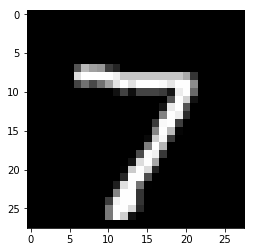

In [30]:
imageToUse = mnist.test.images[0]
plt.imshow(np.reshape(imageToUse,[28,28]), interpolation="nearest", cmap="gray")

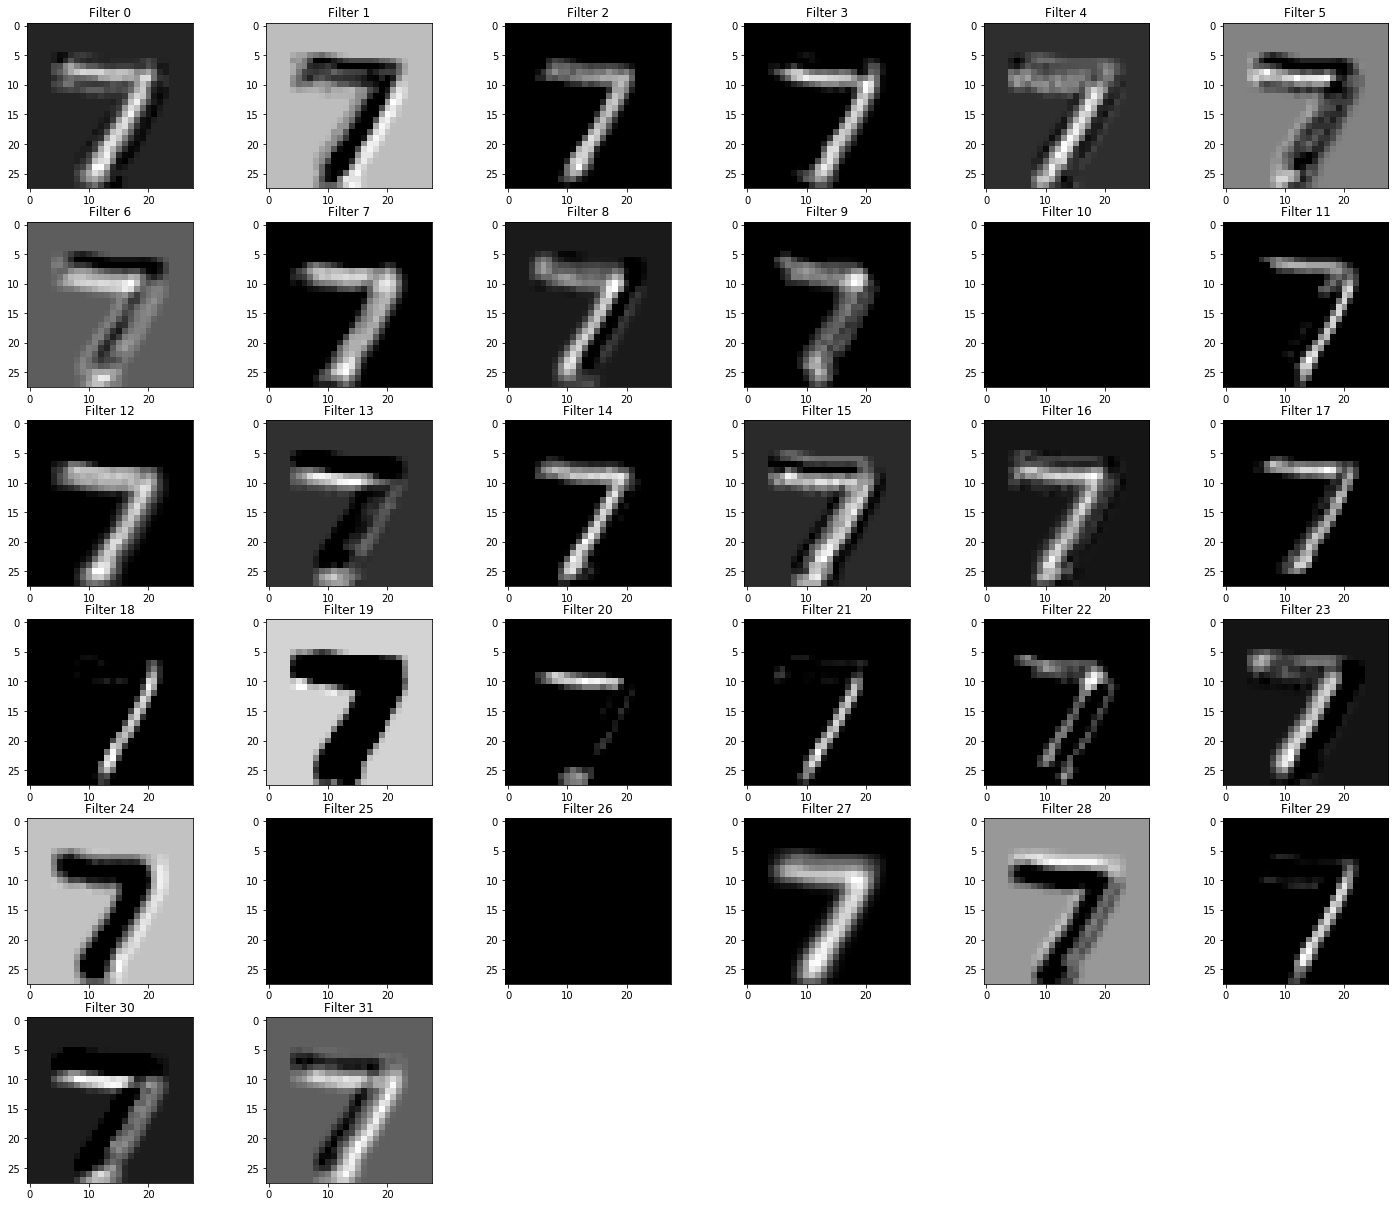

In [36]:
activate(h_conv1,imageToUse)

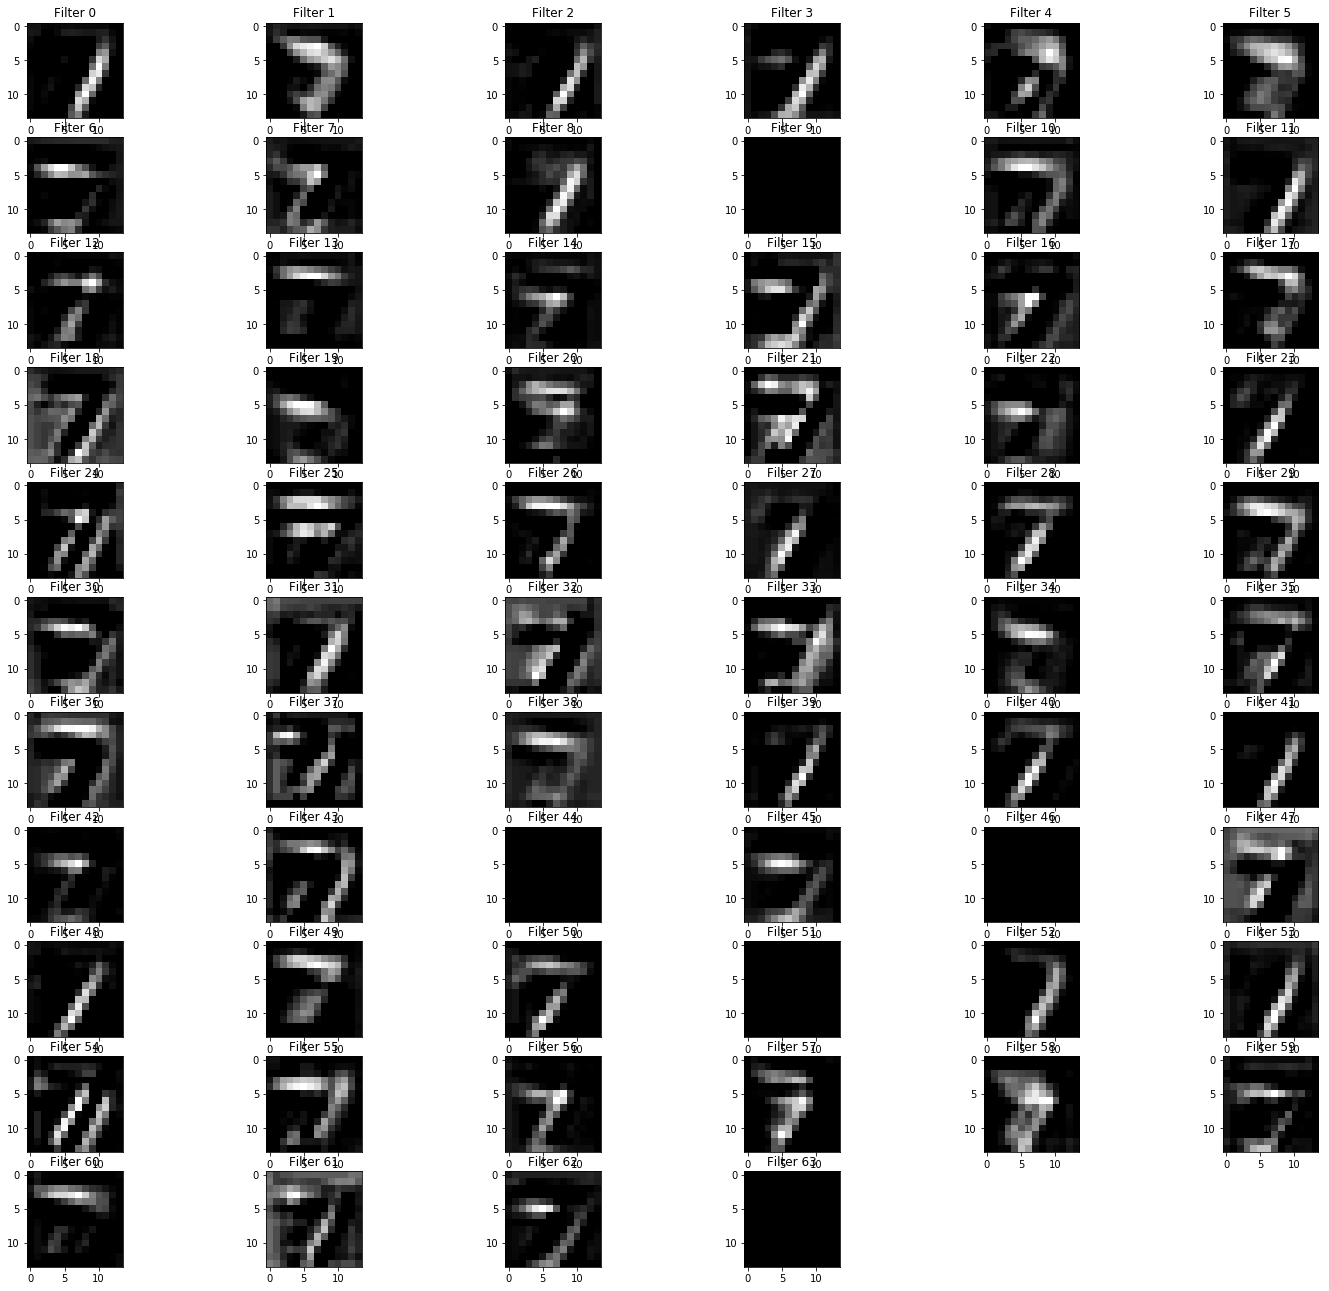

In [37]:
activate(h_conv2,imageToUse)

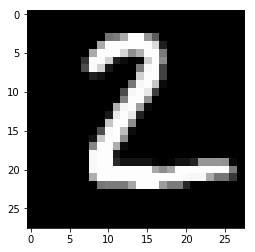

In [39]:
imageToUse_1=mnist.test.images[1]
plt.imshow(np.reshape(imageToUse_1,[28,28]), interpolation="nearest", cmap="gray")

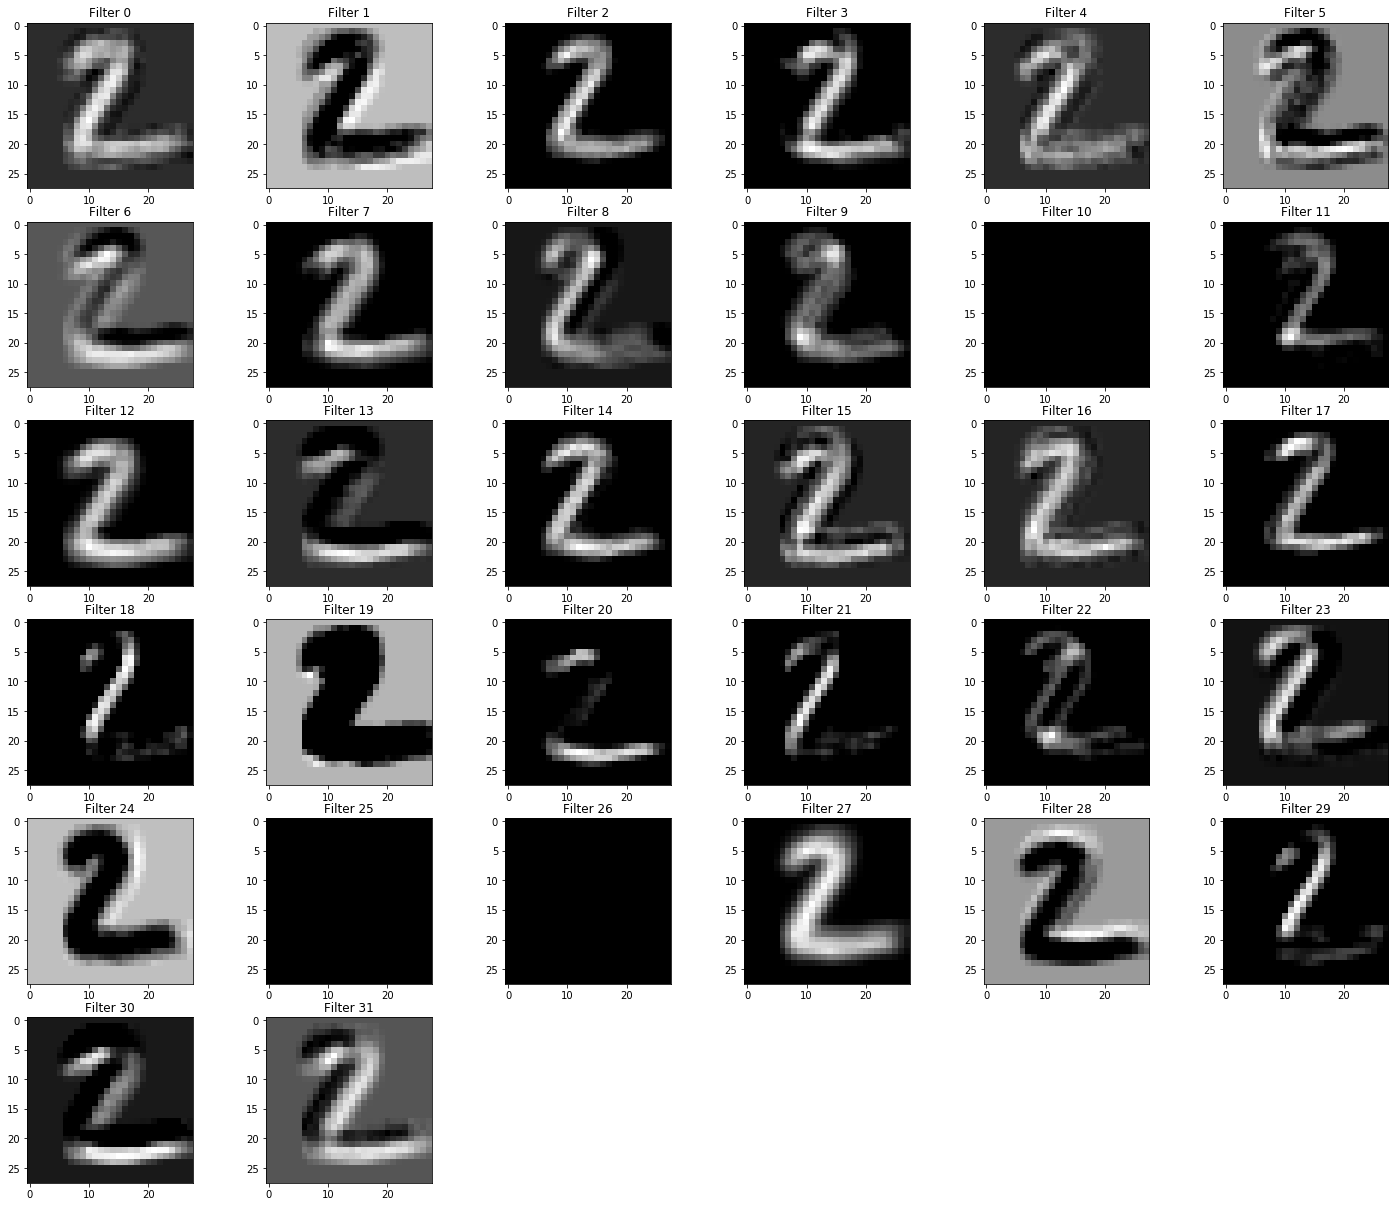

In [40]:
activate(h_conv1,imageToUse_1)